In [1]:
%%capture
import sys
import glob, os
os.chdir('/home/m/m300878/submesoscaletelescope/notebooks/may22/')
sys.path.insert(1, '../')
from icon_smt_levels import dzw, dzt, depthc, depthi
sys.path.insert(1, '/home/m/m300878/submesoscaletelescope/run_batch_job/model_evaluation/')
#from eval_funcs import *
import eval_funcs as eva

import pandas as pd
import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import pyicon as pyic

# A glance at December Data for calculation of Richardsonnumber

## Buoyancy and horizontal gradients

In [ ]:
b = eva.load_smt_b()
b

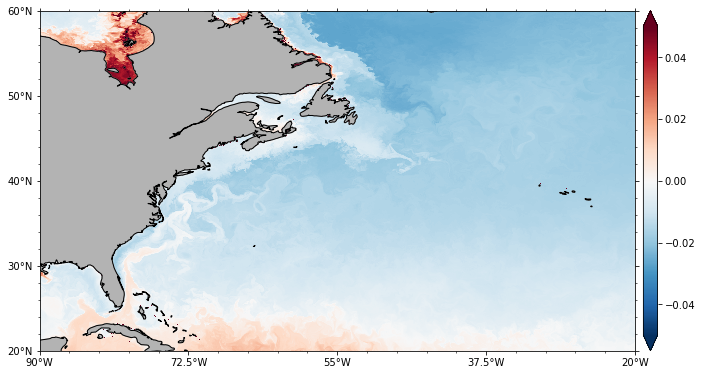

In [39]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= -0.05, 0.05
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(b.b.isel(depthi=1).isel(time=50), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim)
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

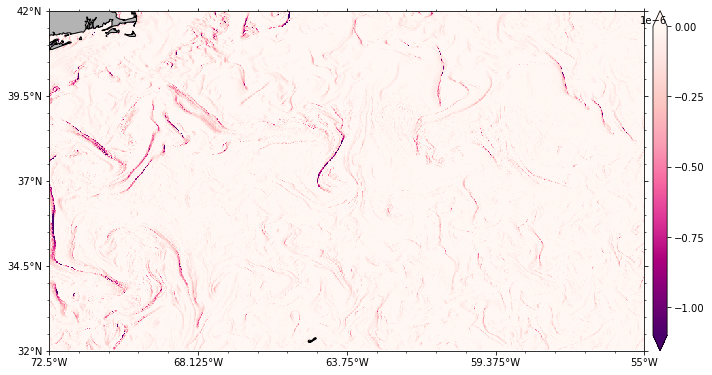

In [ ]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= 0, -1e-6
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, data = pyic.interp_to_rectgrid(b.dbdx.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

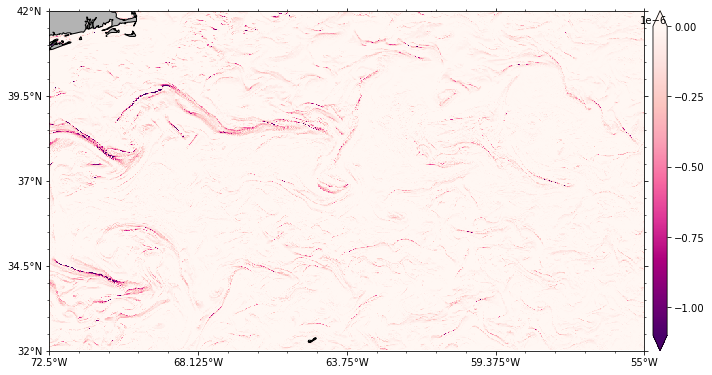

In [ ]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= 0, -1e-6
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(b.dbdy.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

In [ ]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= -0.05, 0.05
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(b.b.isel(depthi=1).isel(time=0), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim)
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

In [6]:
b.time[10]

<xarray.DataArray 'time' ()>
array('2010-03-16T17:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-03-16T17:00:00

In [ ]:
n = eva.load_smt_N2()

## N2

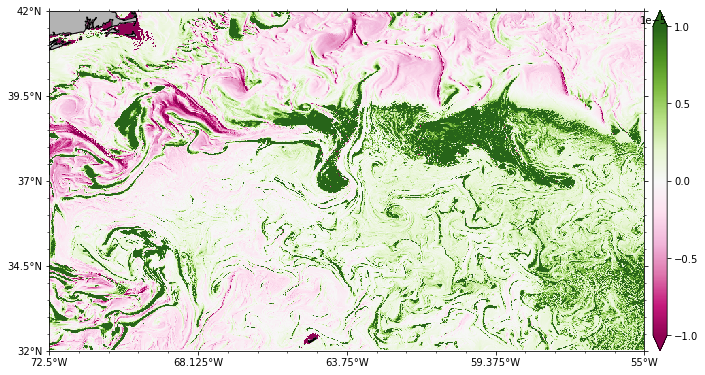

In [33]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= -0.00001, 0.00001
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(n.N2.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim,  cmap='PiYG')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

## Temperature

In [2]:
t = eva.load_smt_T()

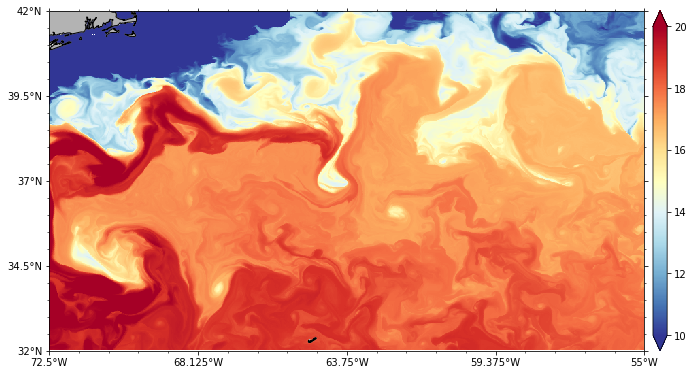

In [36]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= 10, 20
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(t.T005_sp.isel(time=800), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim)
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

## Salinity

In [53]:
s = eva.load_smt_S()


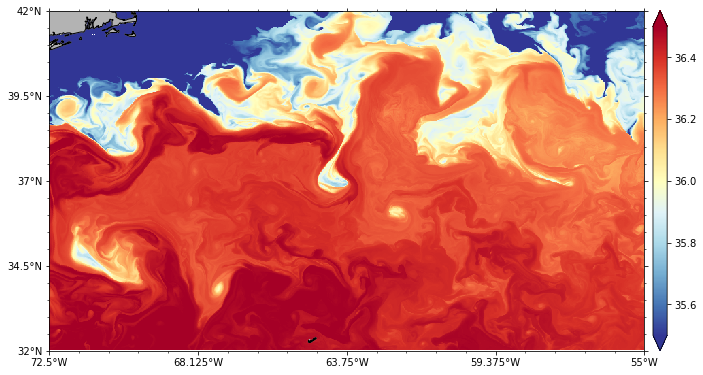

In [74]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= 35.5, 36.5
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(s.S001_sp.isel(time=800), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim)
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

# SELECT Front

In [ ]:
lon_reg = [-65, -60]
lat_reg = [38.75, 41.25]

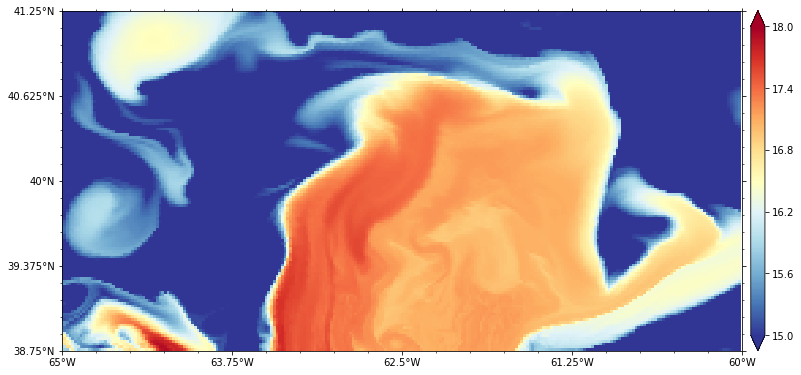

In [27]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
# plot region
clim= 15, 18
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, data = pyic.interp_to_rectgrid(t.T005_sp.isel(time=800), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim)
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

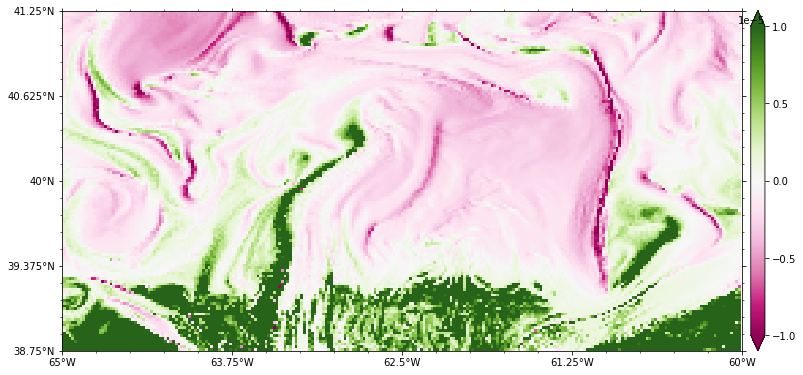

In [33]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
clim= -0.00001, 0.00001
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(n.N2.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim,  cmap='PiYG')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

#data_n2 = data

In [ ]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
clim= 0, -1e-6
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(b.dbdx.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

In [ ]:
data_bx = data

In [ ]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
clim= 0, -1e-6
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(b.dbdy.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

In [ ]:
data_by = data

In [ ]:
data_db2 = np.sqrt(np.power(data_bx,2) + np.power(data_by,2))

In [15]:
data_by.shape

(125, 250)

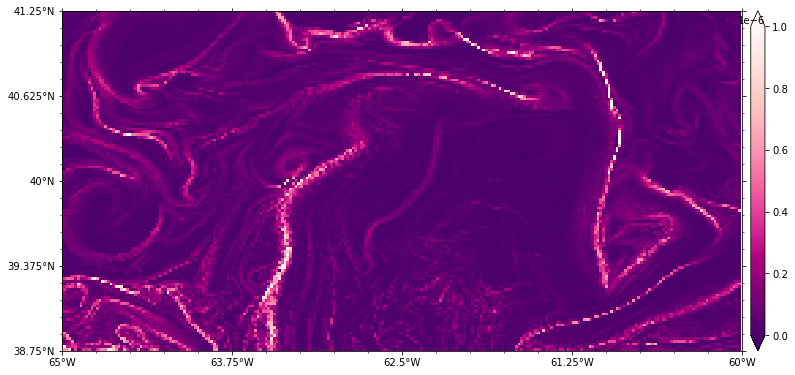

In [16]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
clim= 0, 1e-6
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, data_db2, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

In [17]:
w = eva.load_smt_w()

In [18]:
w

<xarray.Dataset>
Dimensions:  (depthi: 113, time: 85, ncells: 59799625)
Coordinates:
  * depthi   (depthi) float32 0.0 5.0 8.0 11.0 ... 4.731e+03 5.22e+03 5.76e+03
  * time     (time) datetime64[ns] 2010-03-15T21:00:00 ... 2010-03-22T21:00:00
Dimensions without coordinates: ncells
Data variables:
    w        (time, depthi, ncells) float32 dask.array<chunksize=(1, 113, 59799625), meta=np.ndarray>

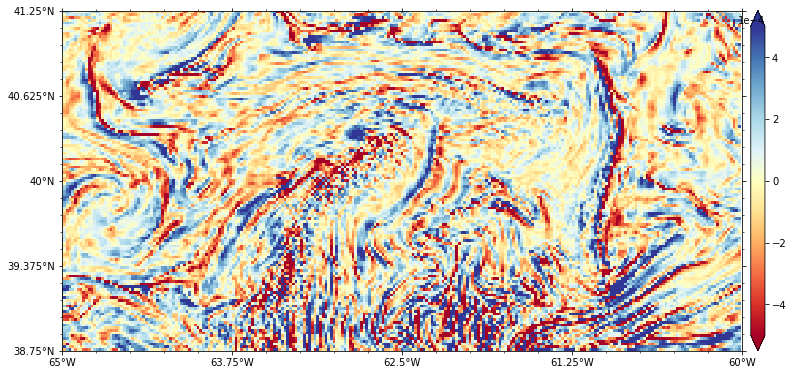

In [21]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
clim= 5e-4
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, data = pyic.interp_to_rectgrid(w.w.isel(depthi=5).isel(time=10), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdYlBu')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

## calc richardsonnumber for that region

In [ ]:
f=2*2*np.pi/86400*np.sin(40*np.pi/180.)
f2 = f**2

In [ ]:
N2 = data_n2
M4 = np.power(data_db2,2)
Ri_b       = N2 * f2  / M4 

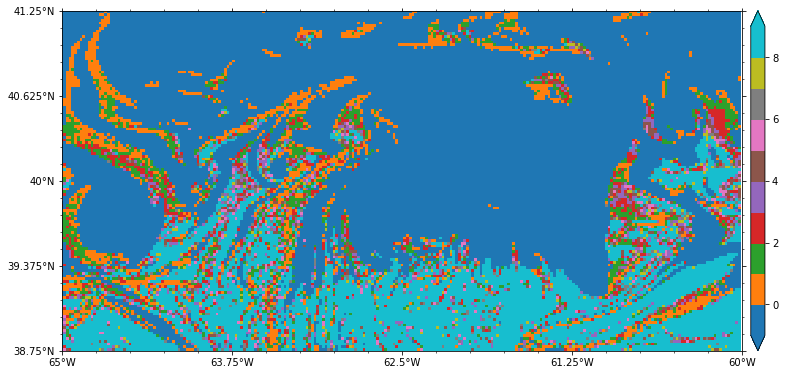

In [39]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
clim= -1, 9
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, Ri_b, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='tab10')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

## averaging

In [47]:

import multiprocessing
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from dask.distributed import Client, LocalCluster, progress # Libaray to orchestrate distributed resources

from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths

In [ ]:
groupby('time.month').mean()

In [ ]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.nc'
#data = pyic.interp_to_rectgrid_xr(b.dbdy.isel(depthi=5), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
inds = pyic.interp_to_rectgrid_xr(b.dbdy.isel(depthi=5), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

#data_by = data


In [ ]:
data

<xarray.DataArray 'dbdy' (lat: 125, lon: 250)>
array([[-8.02141528e-07, -5.48098001e-07,  3.93018070e-07, ...,
         2.72046830e-08,  3.02443475e-08,  5.00126802e-08],
       [-2.27526769e-07,  9.63240495e-07,  2.36463407e-07, ...,
        -1.11856608e-07, -1.22544662e-07, -8.77363746e-08],
       [ 2.29475887e-07, -6.38250768e-08, -1.81044257e-07, ...,
        -1.36611353e-08, -3.03046583e-08, -3.63379051e-08],
       ...,
       [-1.49607029e-08, -1.53733719e-08, -1.15402479e-08, ...,
         1.05327596e-08, -5.96569949e-09, -7.48936113e-09],
       [-3.21820037e-09,  1.30041657e-08,  2.11083240e-08, ...,
        -1.49935264e-08, -2.99683367e-09, -1.36168348e-08],
       [ 6.23622531e-09,  4.81982987e-09, -2.11690665e-09, ...,
        -1.20756320e-08, -6.13128925e-09, -3.02049550e-08]], dtype=float32)
Coordinates:
    depthi   float32 17.0
    time     datetime64[ns] 2010-03-16T17:00:00
  * lat      (lat) float64 38.76 38.78 38.8 38.82 ... 41.18 41.2 41.22 41.24
  * lon      (lon) float64 -65.0 -64.98 -64.96 -64.94 ... -60.06 -60.04 -60.02

In [45]:

def interp_to_rectgrid_xr_inds(arr, fpath_ckdtree, 
                          lon_reg=None, lat_reg=None,
                          coordinates='clat clon',
                          radius_of_influence=1000e3,
                          compute=True,
                          mask_out_of_range=True,
                          mask_out_of_range_before=False,
                         ):

  # --- load interpolation indices
  ds_ckdt = xr.open_dataset(fpath_ckdtree)
  if ('clon' in coordinates) or (coordinates==''):
    inds = ds_ckdt.ickdtree_c
    dist = ds_ckdt.dckdtree_c
  elif 'elon' in coordinates:
    inds = ds_ckdt.ickdtree_e
    dist = ds_ckdt.dckdtree_e
    arr = arr.rename(ncells_2='ncells')
  elif 'vlon' in coordinates:
    inds = ds_ckdt.ickdtree_v
    dist = ds_ckdt.dckdtree_v
  else:
    raise ValueError('::: Error: Unsupported coordinates: %s! ::: ' % (coordinates))
  lon = ds_ckdt.lon.compute().data
  lat = ds_ckdt.lat.compute().data
  if lon_reg is not None:
    indx = np.where((lon>=lon_reg[0]) & (lon<lon_reg[1]))[0]
    indy = np.where((lat>=lat_reg[0]) & (lat<lat_reg[1]))[0]
    lon = lon[indx]
    lat = lat[indy]
    dist = dist.isel(lon=indx, lat=indy)
    inds = inds.isel(lon=indx, lat=indy)
    
  dist = dist.compute()
  inds = inds.compute().data.flatten()
  return(inds)
  # --- interpolate by nearest neighbor
 # arr_interp = arr.isel(ncells=inds)


In [ ]:
t = eva.load_T():
t

# Load averaged Data

In [7]:
idepth = 5
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
lon_reg = [-65, -60]
lat_reg = [38.75, 41.25]


## b

In [3]:
path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/b_mean.nc'
ds_b = xr.open_dataset(path_data, chunks=dict(depthi=1))

In [5]:
lon, lat, b_inter = pyic.interp_to_rectgrid(ds_b.b.isel(depthi=idepth), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)



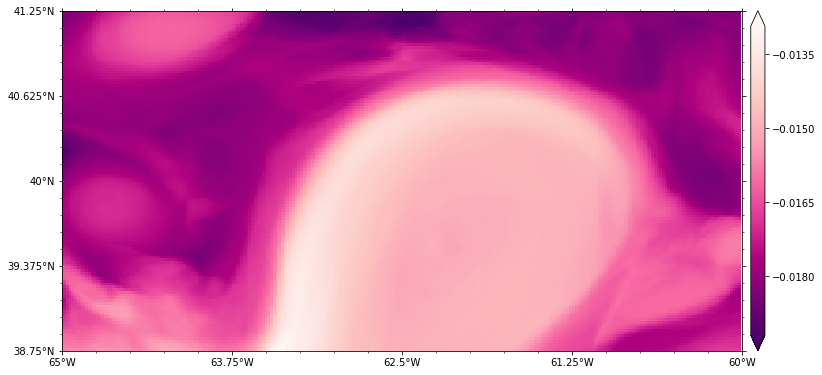

In [7]:
clim= 0, 5e-4
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, b_inter, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False,  cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

### dbdx

In [8]:
path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/dbdx.nc'
ds_dbdx = xr.open_dataset(path_data, chunks=dict(depthi=1))
path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/dbdy.nc'
ds_dbdy = xr.open_dataset(path_data, chunks=dict(depthi=1))


In [9]:
lon, lat, dbdx = pyic.interp_to_rectgrid(ds_dbdx.dbdx.isel(depthi=idepth), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)


In [10]:
lon, lat, dbdy = pyic.interp_to_rectgrid(ds_dbdy.dbdy.isel(depthi=idepth), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)


In [11]:
data_db = np.sqrt(np.power(dbdx,2) + np.power(dbdy,2))

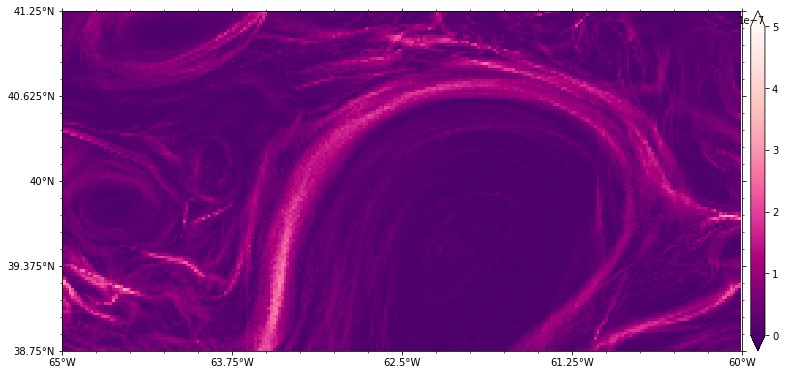

In [15]:
clim= 0, 5e-7
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, data_db, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdPu_r')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

# N2

In [16]:
path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/n2.nc'
ds_n2 = xr.open_dataset(path_data, chunks=dict(depthi=1))

In [19]:
lon, lat, n2 = pyic.interp_to_rectgrid(ds_n2.N2.isel(depthi=idepth), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

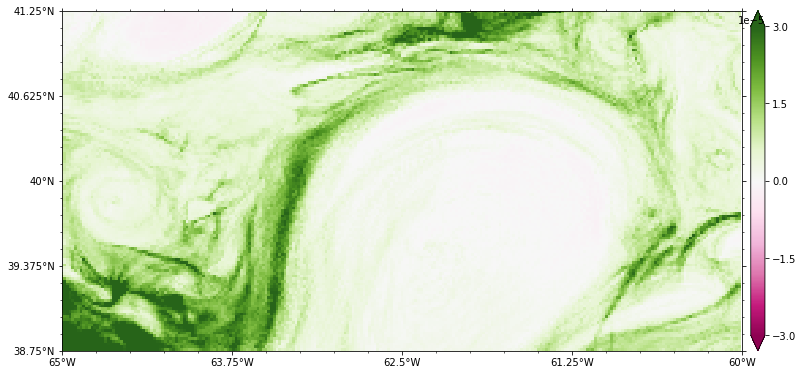

In [28]:
clim= 3e-5
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, n2, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim,  cmap='PiYG')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

In [42]:
f=2*2*np.pi/86400*np.sin(40*np.pi/180.)
f2 = f**2

In [43]:
N2 = n2
M4 = np.power(data_db,2)
Ri_b       = N2 * f2  / M4 

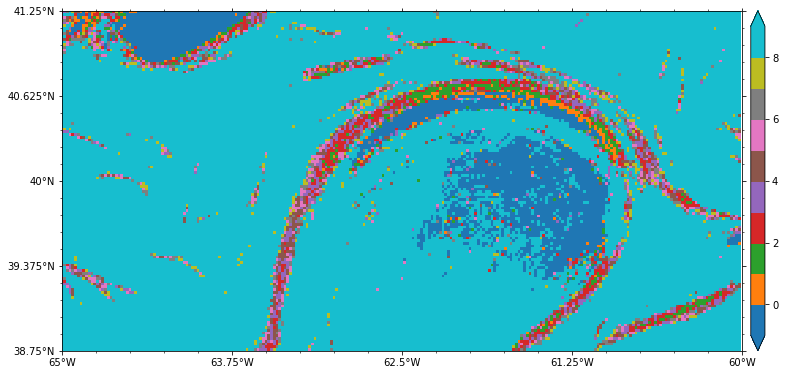

In [44]:
clim= -1, 9
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, Ri_b, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='tab10')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

In [45]:
clim= -1, 9
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, Ri_b, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdYlBu')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

# w

In [8]:
path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/w.nc'
ds_w = xr.open_dataset(path_data, chunks=dict(depthi=1))
ds_w

<xarray.Dataset>
Dimensions:  (depthi: 113, ncells: 59799625)
Coordinates:
  * depthi   (depthi) float32 0.0 5.0 8.0 11.0 ... 4.731e+03 5.22e+03 5.76e+03
Dimensions without coordinates: ncells
Data variables:
    w        (depthi, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>

In [9]:
lon, lat, w = pyic.interp_to_rectgrid(ds_w.w.isel(depthi=5), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

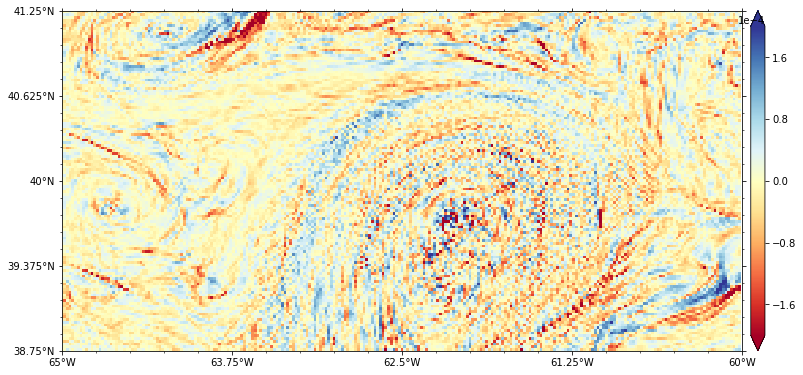

In [13]:
clim= 2e-4
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, w, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False, clim=clim, cmap='RdYlBu')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

## wb mean and w'b'

In [5]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [3]:

path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/wb_mean.nc'
ds_wb = xr.open_dataset(path_data, chunks=dict(depthi=1))
ds_wb = ds_wb.rename(__xarray_dataarray_variable__='wb_mean')
ds_wb

<xarray.Dataset>
Dimensions:  (depthi: 113, ncells: 59799625)
Coordinates:
  * depthi   (depthi) float32 0.0 5.0 8.0 11.0 ... 4.731e+03 5.22e+03 5.76e+03
Dimensions without coordinates: ncells
Data variables:
    wb_mean  (depthi, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>

In [8]:
lon, lat, data_wb = pyic.interp_to_rectgrid(ds_wb.wb_mean.isel(depthi=idepth), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

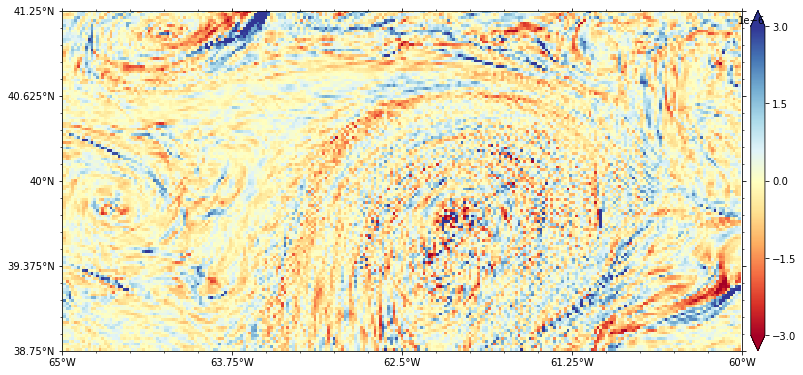

In [12]:
clim= 3e-6
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, data_wb, ax=ax, cax=cax,  transform=ccrs_proj, clim=clim, rasterized=False,  cmap='RdYlBu')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    

In [15]:

path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/wb_prime.nc'
ds_wb_prime = xr.open_dataset(path_data, chunks=dict(depthi=1))
ds_wb_prime = ds_wb_prime.rename(__xarray_dataarray_variable__='wb_prime_mean')
ds_wb_prime

<xarray.Dataset>
Dimensions:        (depthi: 113, ncells: 59799625)
Coordinates:
  * depthi         (depthi) float32 0.0 5.0 8.0 ... 4.731e+03 5.22e+03 5.76e+03
Dimensions without coordinates: ncells
Data variables:
    wb_prime_mean  (depthi, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>

In [16]:
lon, lat, data_wb_prime = pyic.interp_to_rectgrid(ds_wb_prime.wb_prime_mean.isel(depthi=idepth), fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

In [19]:
clim= 1e-7
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, data_wb_prime, ax=ax, cax=cax,  transform=ccrs_proj, clim=clim,  rasterized=False,  cmap='RdYlBu')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)
    